In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
data = sns.load_dataset("iris")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## univariate analysis

In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

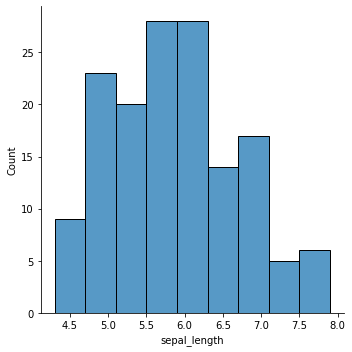

In [10]:
sns.displot(data["sepal_length"])

In [11]:
data["sepal_length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<AxesSubplot:xlabel='sepal_length'>

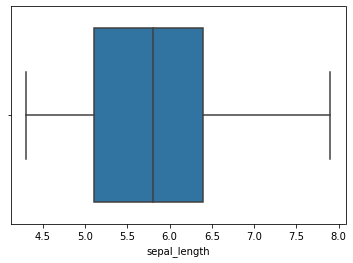

In [12]:
sns.boxplot(data["sepal_length"])

In [13]:
data["sepal_width"].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [14]:
data["petal_length"].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

<AxesSubplot:xlabel='petal_length'>

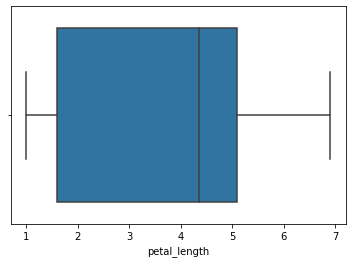

In [15]:
sns.boxplot(data["petal_length"])

<AxesSubplot:xlabel='sepal_length'>

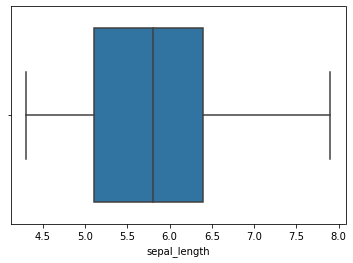

In [16]:
sns.boxplot(data["sepal_length"])

<AxesSubplot:xlabel='sepal_width'>

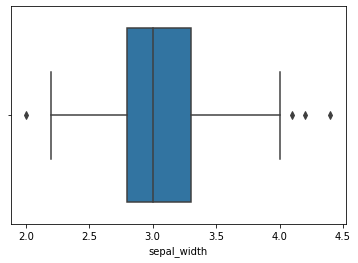

In [17]:
sns.boxplot(data["sepal_width"])

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

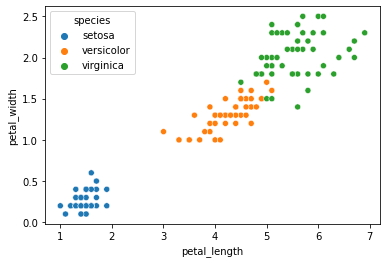

In [18]:
sns.scatterplot(x = data["petal_length"],y = data["petal_width"],hue=data["species"])

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

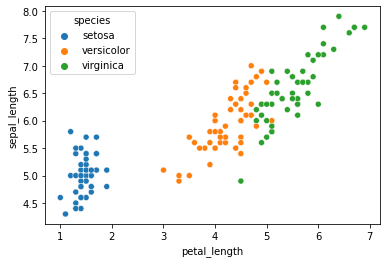

In [19]:
sns.scatterplot(x = data["petal_length"],y = data["sepal_length"],hue=data["species"])

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

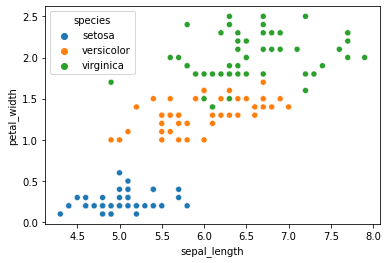

In [20]:
sns.scatterplot(x = data["sepal_length"],y = data["petal_width"],hue=data["species"])

In [21]:
data["species"] = data["species"].map({
    "setosa" : 0,
    "versicolor" : 1,
    "virginica" : 2
})

In [22]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,2
87,6.3,2.3,4.4,1.3,1
61,5.9,3.0,4.2,1.5,1
90,5.5,2.6,4.4,1.2,1
137,6.4,3.1,5.5,1.8,2


In [23]:
data.to_csv("iris_dataset.csv")

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = data["species"]
x = data.drop("species",axis=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [29]:
y_train.shape

(135,)

In [30]:
y_test.shape

(15,)

In [31]:
log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pred = log.predict(x_test)

In [33]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred)

1.0

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,y_pred)

array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]])

In [38]:
accuracy_score(y_train,log.predict(x_train))

0.9703703703703703